# Preparing initial data for further analysis.

The incoming data consists of CSV files containing the tables below:

- **Money** - a table with real-world money transactions
- **Cheaters** - a table with identified users, who cheated the game.
- **Platforms** - a table with gaming platforms (PC, PS4, Xbox)
- **Cash** - a table with the transactions of an in-game currency
- **ABgroup** - a table with a flag of if a user is in a test or in a control group.

By using Pandas library the file downloads the initial data, and deduplicates it.

It also creates a new unified table of all users 'users' is created by merge of tables 'ABgroup', 'Cheaters' and 'Platforms'. 
Furthermore, it aggregates tables of all spending in real-world money and transactions in in-game currency per users and saves the processed data to a separate directory for further analysis.

In [1]:
import pandas as pd

In [11]:
# Reading data from .csv files and saving it in Pandas DataFrames
ab_group = pd.read_csv('data-initial/ABgroup.csv')
cheaters = pd.read_csv('data-initial/Cheaters.csv')
platforms = pd.read_csv('data-initial/Platforms.csv')
money = pd.read_csv('data-initial/Money.csv', parse_dates=['date'], dayfirst=True)
cash = pd.read_csv('data-initial/Cash.csv', parse_dates=['date'], dayfirst=True)

In [12]:
# Dropping duplicates of tables records
ab_group = ab_group.drop_duplicates()
cheaters = cheaters.drop_duplicates()
platforms = platforms.drop_duplicates()
money = money.drop_duplicates()
cash = cash.drop_duplicates()

In [13]:
# Creating a unified DataFrame of users by merging DataFrames 'ab_group', 'cheaters' and 'platforms'
users = ab_group.merge(cheaters, how='outer', on='user_id').merge(platforms, how='outer', on='user_id')

In [14]:
# Checking data in a new DataFrame 'users' 
users.head(3)

,user_id,group,cheaters,platform
0,VX6NLA-F5YMSW,control,0,XBox
1,2AXN3D-71ZN86,test,0,PC
2,K78V3J-TQMV6F,test,0,XBox


In [18]:
# In total we have information about 1 080 000 users
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080000 entries, 0 to 1079999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   user_id   1080000 non-null  object
 1   group     1080000 non-null  object
 2   cheaters  1080000 non-null  int64 
 3   platform  1080000 non-null  object
dtypes: int64(1), object(3)
memory usage: 41.2+ MB


In [21]:
cash.head()

,user_id,date,cash
0,GGLSXL-U5BGGY,2021-07-17,200
1,DPWFFN-NL3VF8,2021-07-16,150
2,PASNNG-GVW4RR,2021-07-11,1100
3,4F0AW7-F40GY9,2021-07-15,1050
4,CEY6AF-YTSM4V,2021-07-15,150


In [22]:
money.head()

,user_id,date,money
0,N4TS2T-P7YTVX,2021-07-15,1.99
1,NX9S0D-VM20W8,2021-07-16,0.99
2,QYY6FW-FKHRND,2021-07-15,0.00
3,BRWH4Y-LPGBU6,2021-07-14,0.00
4,8O317F-4ASK53,2021-07-13,0.00


Now relations between tables 'users', 'cash' and 'money' are as follows:  

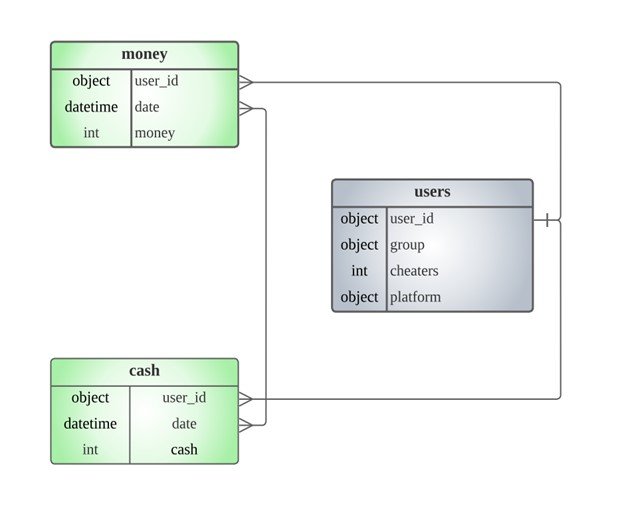

In [19]:
# Aggregating DataFrames 'money' and 'cash' by the field 'user_id', 
# so relationship between new DF 'money_agg', 'cash_agg' and 'users' 
# could become 'one-to-one'
money_agg = money.groupby('user_id').sum('numeric_only')
cash_agg = cash.groupby('user_id').sum('numeric_only')

In [20]:
# downloading the processed data
users.to_csv('data-processed/users.csv', sep=',', index=False)
money.to_csv('data-processed/money.csv', index=False)
money_agg.to_csv('data-processed/money_agg.csv')
cash.to_csv('data-processed/cash.csv', index=False)
cash_agg.to_csv('data-processed/cash_agg.csv')